<a href="https://colab.research.google.com/github/lcbjuk/ML/blob/master/Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Arvore de Decisao**



In [0]:
from google.colab import drive
#drive.mount('/content/drive')

In [0]:
!pwd

/content


In [0]:
!whoami

root


In [0]:
! ls 

drive  sample_data


In [0]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
!apt-get install graphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
import pandas as pd
volei = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/JogarVolei%20-%20OKK%20-%20T.csv')
volei.head(3)

,previsao,temperatura,umidade,vento,jogar
0,1,1,1,0,0
1,1,1,1,1,0
2,0,1,1,0,1


In [0]:
from sklearn.tree import  DecisionTreeClassifier

arv = DecisionTreeClassifier(max_depth=2)
arv.fit(volei[['previsao',	'temperatura',	'umidade',	'vento']] , volei['jogar'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

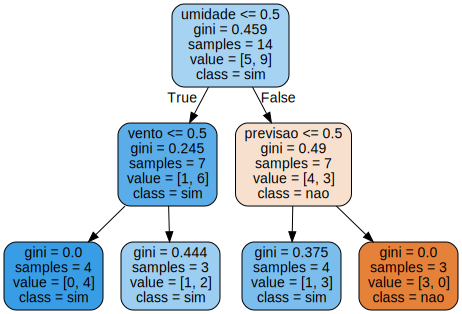

In [0]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot_data = export_graphviz(arv, out_file=None, filled=True, rounded=True,
                           feature_names=['previsao',	'temperatura',	'umidade',	'vento'],
                           class_names=['nao','sim'])
Source(dot_data)

**Exercicio Arvore de Decisao**

In [0]:
!pip install graphviz

In [0]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
credito = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
credito.head()

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


In [0]:
from sklearn.tree import DecisionTreeClassifier

tre = DecisionTreeClassifier (max_depth=3)
tre.fit( credito[['Genero',	'GrauEscolaridade',	'Profissao',	'Renda']] , credito['Inadimplente'] ) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

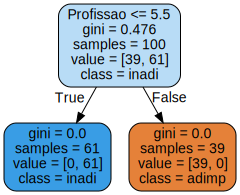

In [0]:
from sklearn.tree import export_graphviz
from graphviz import Source

dd = export_graphviz(tre, out_file=None, filled=True, rounded=True,
                     feature_names= ['Genero',	'GrauEscolaridade',	'Profissao',	'Renda'],
                     class_names=['adimp','inadi'])
Source(dd)


**Apriori**

In [0]:
!pip install mlxtend

In [0]:
mercado = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/mercado%20-%20ok.csv')
mercado

,refri,batata,burger,donut,cafe
0,1,1,1,0,0
1,0,1,1,1,0
2,0,0,0,1,1
3,1,1,0,1,0
4,1,1,1,0,1
5,1,1,1,1,1


In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

association_rules( apriori(mercado, min_support=0.5,use_colnames=True)  ) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(refri),(batata),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf
1,(burger),(batata),0.666667,0.833333,0.666667,1.0,1.2,0.111111,inf
2,"(burger, refri)",(batata),0.500000,0.833333,0.500000,1.0,1.2,0.083333,inf


**Exercicio Apriori**

In [0]:
hot_encoded_cred = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20hot_enc.csv')
hot_encoded_cred

,Inadimplente,Genero_M,fund_incomp,fund_comp,medio_incomp,superior_incomp,superior_comp,auto_didata,vendedor,corretor,atendente,youtuber,programador,Renda_Alta
0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,0,1,0,1
3,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,0,1,0,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,1,0,0,0,0,1,0,0,0,0,0
96,1,1,0,1,0,0,0,0,1,0,0,0,0,0
97,0,0,0,0,0,1,0,0,0,0,0,0,1,0
98,0,1,0,0,0,1,0,0,0,0,0,0,1,1


In [0]:
association_rules( apriori(hot_encoded_cred, min_support=0.23,use_colnames=True)  ) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(fund_comp),(Inadimplente),0.43,0.61,0.43,1.000000,1.639344,0.1677,inf
1,(corretor),(Inadimplente),0.27,0.61,0.27,1.000000,1.639344,0.1053,inf
2,(programador),(Genero_M),0.29,0.66,0.24,0.827586,1.253918,0.0486,1.972
3,(Renda_Alta),(Genero_M),0.32,0.66,0.32,1.000000,1.515152,0.1088,inf
4,(programador),(Renda_Alta),0.29,0.32,0.24,0.827586,2.586207,0.1472,3.944
5,"(Renda_Alta, programador)",(Genero_M),0.24,0.66,0.24,1.000000,1.515152,0.0816,inf
6,"(Genero_M, programador)",(Renda_Alta),0.24,0.32,0.24,1.000000,3.125000,0.1632,inf
7,(programador),"(Renda_Alta, Genero_M)",0.29,0.32,0.24,0.827586,2.586207,0.1472,3.944
